# **Install required Libraries **

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
!pip install concrete-ml


In [ ]:
from concrete.ml.sklearn import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
from concrete.ml.sklearn import DecisionTreeRegressor as ConcreteDecisionTree
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from concrete.ml.sklearn import DecisionTreeRegressor as ConcreteDecisionTree


# **Data Preprocessing**

In [ ]:

file_path = "Dataset  - data.csv"
df = pd.read_csv(file_path)

df.head(3)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.24964,49,0,Self_Employed,Tier_1,13391.174890,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627710,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.59659,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.60508,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450620,1466.073984,473.549752,410.857129,459.965257,488.383423,7.290892,106.653597,138.542422


In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422245,0.000000,580.204749,2165.426419,1124.578013,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091534,1933.845509,1029.109727,1020.198375,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940490,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104081,...,6216.309609,13331.950715,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674700,123080.682000,38734.932930,119816.898100,81861.503460,34406.100170,38667.368310,...,245504.485200,377060.218500,34894.644400,12273.258240,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


# **Feature Engineering - Grouping Data **

In [ ]:
df['Total_Potential_Savings'] = (df['Potential_Savings_Groceries'] + df['Potential_Savings_Transport'] +
                                 df['Potential_Savings_Eating_Out'] + df['Potential_Savings_Entertainment'] +
                                 df['Potential_Savings_Utilities'] + df['Potential_Savings_Healthcare'] +
                                 df['Potential_Savings_Education'] + df['Potential_Savings_Miscellaneous'])

df['Total_Discretionary_Expenses'] = df['Transport'] + df['Eating_Out'] + df['Entertainment'] + df['Miscellaneous']
df['Total_Essential_Expenses'] = df['Groceries'] + df['Utilities'] + df['Healthcare'] + df['Education'] + df['Insurance']

In [ ]:
df_processed = df.drop(columns=['Potential_Savings_Groceries', 'Potential_Savings_Transport',
                                'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
                                'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
                                'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
                                'Transport', 'Eating_Out', 'Entertainment', 'Miscellaneous',
                                'Groceries', 'Utilities', 'Healthcare', 'Education', 'Insurance'])

# Label Encoding for City_Tier (Ordinal)

In [ ]:
label_encoder = LabelEncoder()
df_processed['City_Tier'] = label_encoder.fit_transform(df_processed['City_Tier'])
df_processed.head(3)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Potential_Savings,Total_Discretionary_Expenses,Total_Essential_Expenses
0,44637.24964,49,0,Self_Employed,0,13391.174890,0.000000,13.890948,6200.537192,11265.627710,3507.222842,6656.481797,13323.965240
1,26858.59659,34,2,Retired,1,5371.719318,0.000000,7.160376,1923.176434,9676.818733,1482.618056,3806.873626,8003.184915
2,50367.60508,35,1,Student,2,7555.140763,4612.103386,13.997808,7050.360422,13891.450620,3551.316457,7086.888925,17222.021385


# One-Hot Encoding for Occupation (Nominal)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_occupation = encoder.fit_transform(df[['Occupation']])
encoded_df = pd.DataFrame(encoded_occupation, columns=encoder.get_feature_names_out(['Occupation']))
encoded_df.head(3)


,Occupation_Retired,Occupation_Self_Employed,Occupation_Student
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


In [ ]:
df_processed = df_processed.drop(columns=['Occupation']).reset_index(drop=True)
df_processed = pd.concat([df_processed, encoded_df], axis=1)
df_processed.head(3)

,Income,Age,Dependents,City_Tier,Rent,Loan_Repayment,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Potential_Savings,Total_Discretionary_Expenses,Total_Essential_Expenses,Occupation_Retired,Occupation_Self_Employed,Occupation_Student
0,44637.24964,49,0,0,13391.174890,0.000000,13.890948,6200.537192,11265.627710,3507.222842,6656.481797,13323.965240,0.0,1.0,0.0
1,26858.59659,34,2,1,5371.719318,0.000000,7.160376,1923.176434,9676.818733,1482.618056,3806.873626,8003.184915,1.0,0.0,0.0
2,50367.60508,35,1,2,7555.140763,4612.103386,13.997808,7050.360422,13891.450620,3551.316457,7086.888925,17222.021385,0.0,0.0,1.0


TRAIN TEST SPLIT

In [34]:
X = df_processed.drop(columns=['Total_Potential_Savings'])
y = df_processed['Total_Potential_Savings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Income,Age,Dependents,City_Tier,Rent,Loan_Repayment,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Discretionary_Expenses,Total_Essential_Expenses,Occupation_Retired,Occupation_Self_Employed,Occupation_Student
5894,43033.00974,34,3,1,8606.601947,0.000000,14.341768,6171.694390,12123.213460,7335.247483,14967.946849,0.0,0.0,1.0
3728,11489.56646,19,4,0,3446.869937,2051.213623,7.287937,697.660941,697.660941,1733.909271,3559.912685,1.0,0.0,0.0
8958,64302.91601,31,3,0,19290.874800,0.000000,14.716779,9463.317967,12213.291240,11982.394907,20816.355062,0.0,1.0,0.0
7671,5985.12004,35,3,2,897.768006,308.373725,6.922311,414.308638,1879.544464,1059.848112,1839.585734,0.0,1.0,0.0
5999,11763.16238,60,1,1,2352.632477,0.000000,8.025482,944.050435,3331.198697,1568.089795,4511.241415,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,17908.59374,33,0,0,5372.578121,0.000000,9.404633,1684.237541,5148.834548,2728.596006,4658.585064,0.0,1.0,0.0
11964,15504.33313,44,4,1,3100.866626,1634.134922,7.678965,1190.572238,3689.671336,2118.505854,4961.154393,1.0,0.0,0.0
5390,17144.29988,30,2,0,5143.289963,0.000000,8.820687,1512.244972,3559.640640,2216.195372,6225.173900,0.0,0.0,1.0
860,35287.74718,32,1,1,7057.549436,2309.942586,8.546843,3015.988252,6527.143816,6295.561428,13097.549915,0.0,0.0,1.0


**We have selected a random subset of 10,000 entries from the processed dataset to optimize computation time, as training on the full dataset may be resource-intensive since CONCRETE ML takes higher computation power. The dataset is then split into 80% training data and 20% test data using train_test_split for effective model evaluation.**

In [37]:
from sklearn.model_selection import train_test_split
df_small = df_processed.sample(n=10000, random_state=42)
X = df_small.drop(columns=['Total_Potential_Savings'])
y = df_small['Total_Potential_Savings']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (8000, 14) (8000,)
Test Data Shape: (2000, 14) (2000,)


# **Model Training and Evaluation:** Selecting the Best Model for Concrete ML
In this step, we train multiple regression models and evaluate their performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score. The goal is to identify the best-performing model before proceeding with Concrete ML for privacy-preserving machine learning.



In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from concrete.ml.sklearn import LinearRegression as ConcreteLinearRegression
from concrete.ml.sklearn import DecisionTreeRegressor as ConcreteDecisionTreeRegressor
from concrete.ml.sklearn import RandomForestRegressor as ConcreteRandomForestRegressor

# Define models compatible with Concrete ML
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet()
}

# Store performance results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}
    print(f" {name} Performance:")
    print(f"   MAE: {mae:.4f} | MSE: {mse:.4f} | R² Score: {r2:.4f}")

# Select best model based on R² Score
best_model_name = max(results, key=lambda x: results[x]["R2 Score"])
print(f"Best Performing Model: {best_model_name} with R² Score = {results[best_model_name]['R2 Score']:.4f}")


 DecisionTreeRegressor Performance:
   MAE: 569.8588 | MSE: 846859.9820 | R² Score: 0.8607
 LinearRegression Performance:
   MAE: 406.0224 | MSE: 418880.7011 | R² Score: 0.9311
 RandomForestRegressor Performance:
   MAE: 416.7020 | MSE: 440404.9325 | R² Score: 0.9276
 XGBRegressor Performance:
   MAE: 433.8841 | MSE: 503149.4689 | R² Score: 0.9173
 Lasso Performance:
   MAE: 405.9664 | MSE: 419034.3117 | R² Score: 0.9311
 Ridge Performance:
   MAE: 406.0334 | MSE: 418983.3929 | R² Score: 0.9311
 ElasticNet Performance:
   MAE: 405.8386 | MSE: 419365.9371 | R² Score: 0.9310
Best Performing Model: LinearRegression with R² Score = 0.9311


In [39]:
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}
    print(f" {name} Performance:")
    print(f"   MAE: {mae:.4f} | MSE: {mse:.4f} | R² Score: {r2:.4f}")


best_model = max(results, key=lambda x: results[x]["R2 Score"])
print(f"Best Performing Model: {best_model} with R² Score = {results[best_model]['R2 Score']:.4f}")

# Store Best Model for Later
selected_model = models[best_model]

 DecisionTreeRegressor Performance:
   MAE: 582.4268 | MSE: 927450.0568 | R² Score: 0.8475
 LinearRegression Performance:
   MAE: 406.0224 | MSE: 418880.7011 | R² Score: 0.9311
 RandomForestRegressor Performance:
   MAE: 416.7020 | MSE: 440404.9325 | R² Score: 0.9276
Best Performing Model: LinearRegression with R² Score = 0.9311


<Figure size 1200x500 with 0 Axes>

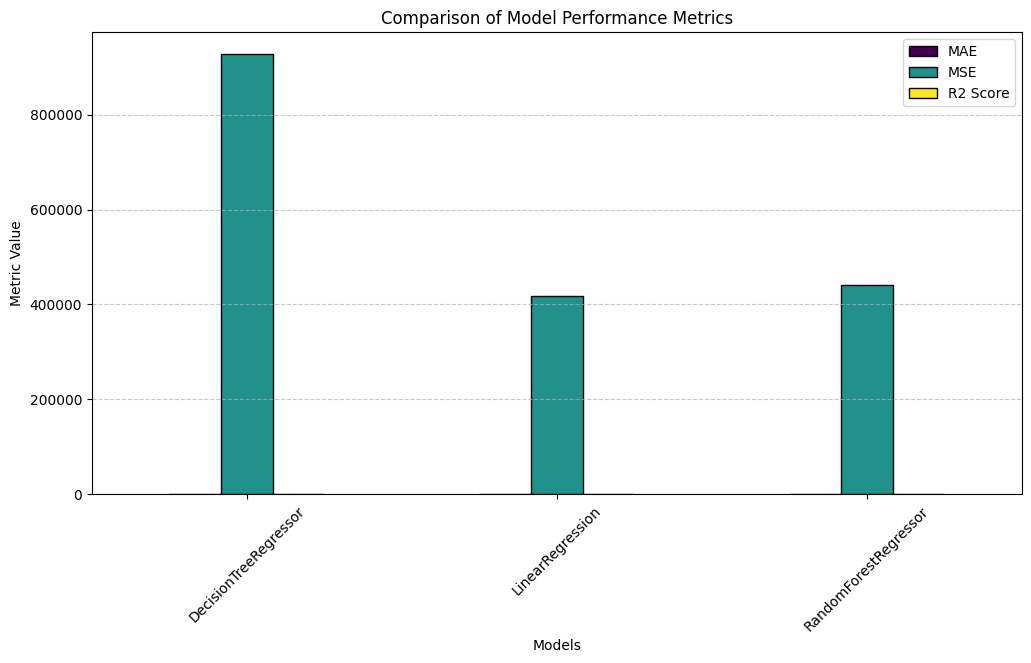

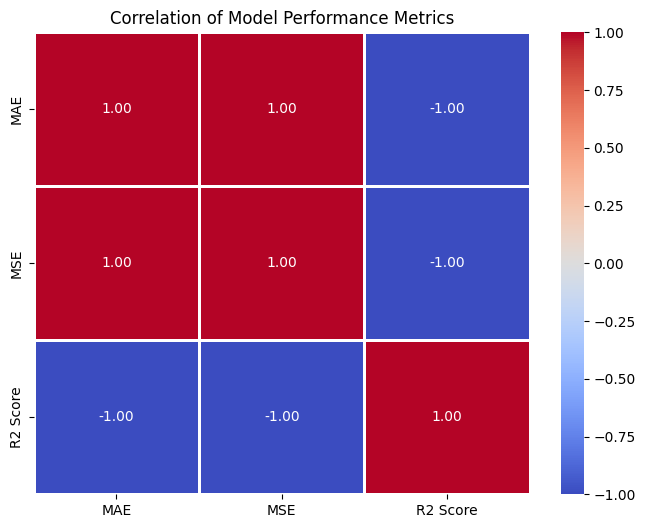

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
results_df = pd.DataFrame(results).T


plt.figure(figsize=(12, 5))
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Metric Value")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(results_df.corr(), annot=True, cmap='coolwarm', linewidths=1, fmt=".2f")
plt.title("Correlation of Model Performance Metrics")
plt.show()


# **Building a Decision Tree Regressor with Concrete ML**
We use Concrete ML's Decision Tree Regressor to build a privacy-preserving model. Once the model is trained, it must be compiled to optimize and store its parameters for efficient encrypted execution.

In [40]:


concrete_dt = ConcreteDecisionTree(n_bits=8, max_depth=6, min_samples_split=5)
concrete_dt.fit(X_train, y_train)

# Compile the model
concrete_dt.compile(X_train)


Measuring Initial R2 score

In [41]:


y_pred = concrete_dt.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 409.9634962044011
R² Score: 0.9291372046766343


# PARAMETER TUNING:
To optimize the performance of our Concrete ML Decision Tree Regressor, we perform Grid Search Cross-Validation across a range of hyperparameters. This ensures we select the best combination for accurate and efficient predictions in an encrypted setting.

In [42]:


# Define hyperparameter grid
param_grid = {
    "max_depth": [4, 6, 8, 10],
    "min_samples_split": [2, 5, 10],
    "n_bits": [4, 6, 8]
}

# Custom scoring function (Negative MAE for minimization)
scoring = {"MAE": make_scorer(mean_absolute_error, greater_is_better=False),
           "R2": make_scorer(r2_score)}

# Define Concrete ML model
concrete_dt = ConcreteDecisionTree()

# Perform Grid Search
grid_search = GridSearchCV(concrete_dt, param_grid, scoring=scoring, refit="MAE", cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END .........max_depth=4, min_samples_split=2, n_bits=4; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=4; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=4; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=6; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=6; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=6; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=8; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=8; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=2, n_bits=8; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=5, n_bits=4; total time=   0.1s
[CV] END .........max_depth=4, min_samples_split=5, n_bits=4; total time=   0.1s
[CV] END .........max_depth=4, min_samples_spli

**Store the best model**

In [43]:
best_model = grid_search.best_estimator_

In [44]:
y_pred = best_model.predict(X_train)

# Evaluate
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Best Model - MAE: {mae}")
print(f"Best Model - R² Score: {r2}")

Best Model - MAE: 409.9634962044011
Best Model - R² Score: 0.9291372046766343


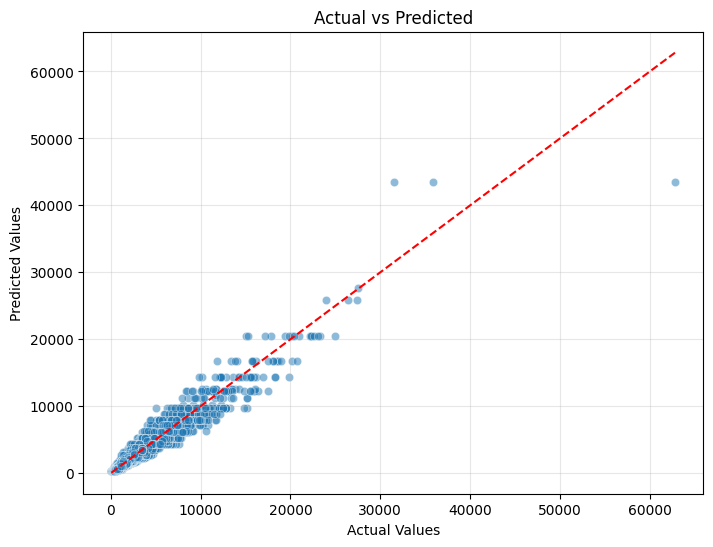

In [51]:

y_pred_train = best_model.predict(X_train)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Perfect Fit Line
plt.title(f"Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(alpha=0.3)
plt.show()


**Compile the best model**

In [45]:
compiled_ = best_model.compile(X_train)

# SAVING MODEL FOR CALLING IT IN FUTURE

This section demonstrates the deployment and execution of a Fully Homomorphic Encryption (FHE) model using Concrete ML. The process involves saving the trained model, setting up a client-server architecture for FHE inference, and performing encrypted predictions.

In [ ]:
import shutil
from pathlib import Path
from concrete.ml.deployment import FHEModelDev

In [ ]:
path_to_model = Path("/content/sample_data/Dataset").resolve()
if path_to_model.exists():
    shutil.rmtree(path_to_model)

Save the Trained Model:

The best-performing model (best_model) is saved to a specified directory using FHEModelDev

Two key files, client.zip and server.zip, are created during this process, which contain the necessary components for secure FHE operations.

In [ ]:
dev = FHEModelDev(path_to_model, best_model)
dev.save(via_mlir=True)

In [ ]:
from concrete.ml.deployment import FHEModelClient
from pathlib import Path

# ✅ Define the path to the saved model
path_to_model = Path("/content/sample_data/Dataset").resolve()

# ✅ Load the saved FHE model
fhe_model = FHEModelClient(path_dir=path_to_model)


Load the Saved FHE Model on the Client:

The saved FHE model is loaded on the client side using FHEModelClient.

In [ ]:
from concrete.ml.deployment import FHEModelClient
from pathlib import Path

# Path to the saved model
path_to_model = Path("/content/sample_data/Dataset").resolve()

# Load the model on the client
client = FHEModelClient(path_to_model, key_dir=path_to_model / "keys")



The client generates private and evaluation keys required for FHE operations.

In [ ]:
# Generate keys
client.generate_private_and_evaluation_keys()

prepare Input Data for FHE Inference:

A sample input (X_test_sample) is prepared for inference. This input is quantized, encrypted, and serialized for secure transmission to the server.

In [ ]:
import numpy as np

X_test_sample = np.array([[33598.25097, 33, 3, 0, 10079.47529, 0,
                           5.747093, 1930.922587, 7765.710254,
                           4635.48074, 11117.584682, 0, 0, 1]])


encrypted_input = client.quantize_encrypt_serialize(X_test_sample)


Fetching Evaluation key

In [ ]:
# Serialize the evaluation key
evaluation_key = client.get_serialized_evaluation_keys()

# Send encrypted_input and evaluation_key to the server
# (This step depends on your server-client communication setup)

Run the model using FHEModelServer , which takes in evaluation key from client and encrypted input

In [ ]:
from concrete.ml.deployment import FHEModelServer
from pathlib import Path

# Path to the saved model
path_to_model = Path("/content/sample_data/Dataset").resolve()

# Load the model o  n the server
server = FHEModelServer(path_to_model)

# Run inference on the encrypted data
encrypted_output = server.run(encrypted_input, evaluation_key)

# Send encrypted_output back to the client
# (This step depends on your server-client communication setup)

Decrypting the encrypted output

In [ ]:
# Deserialize the encrypted output

# Decrypt the result
decrypted_output = client.deserialize_decrypt_dequantize(encrypted_output)

print("Final Output:", decrypted_output)

Final Output: [1970.23235294]
